In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ROOT
import math
import array

Welcome to JupyROOT 6.28/00


# Misure dei rate
Abbiamo misurato i rate dei tre scintillatori al fine di scegliere la soglia dei discriminatori.

In [2]:
def misure_frame(Mis,time,soglia):
    dict_mis = {}
    for i in range(len(Mis[0])):
        mis = []
        for j in range(len(Mis)):
            mis.append(Mis[j][i])
        name = "soglia" + str(soglia[i])
        #print(mis)
        dict_mis[name] = mis
    df_mis = pd.DataFrame(dict_mis)
    count_mean =[]
    count_std = []
    for i in range(len(soglia)):
        name = "soglia" + str(soglia[i])
        mean = np.mean(df_mis[name])
        std  = np.std(df_mis[name])
        count_mean.append(mean)
        count_std.append(std)
    rate_mean = np.array(count_mean)/time #Per fare il rate ho solo divso per il tempo e non ho conisderato erroi sul tempo
    rate_std = np.array(count_std)/time
    return rate_mean, rate_std, df_mis

## Rate SDW

In [3]:
soglia_dw = [5, 10, 20,25,30,35,40,45,50,55,60,65,70]
err_soglia = [0.01] #Scegliendo come errore la sensibilità dello strumento, ossia il multimetro.
time_dw = [30,30,30,30,30,30,30,30,40,40,40,40,40] #Il tempo è in secondi

In [4]:
misura_1 = [156446,146339,25257,19955,15751,12594,10236,8402,8983,7527,6258,4766,4149]
misura_2 = [158497,145560,25430,20227,15669,12675,10136,8226,9186,7394,6037,4837,3974]
misura_3 = [161263,148082,25900,19587,15695,12291,10161,8450,9360,7352,6052,4934,4192]
misura_4 = [157701,149981,25441,19031,15168,12201,10221,8396,9098,7517,5815,4717,4461]
misura_5 = [160044,152852,25072,19773,15448,12513,10365,8200,9122,7342,5827,4743,4140]
mis_dw = [misura_1, misura_2,misura_3,misura_4,misura_5]


In [5]:
mean_dw, std_dw, df_dw = misure_frame(mis_dw, time_dw,soglia_dw)

In [6]:
df_dw

,soglia5,soglia10,soglia20,soglia25,soglia30,soglia35,soglia40,soglia45,soglia50,soglia55,soglia60,soglia65,soglia70
0,156446,146339,25257,19955,15751,12594,10236,8402,8983,7527,6258,4766,4149
1,158497,145560,25430,20227,15669,12675,10136,8226,9186,7394,6037,4837,3974
2,161263,148082,25900,19587,15695,12291,10161,8450,9360,7352,6052,4934,4192
3,157701,149981,25441,19031,15168,12201,10221,8396,9098,7517,5815,4717,4461
4,160044,152852,25072,19773,15448,12513,10365,8200,9122,7342,5827,4743,4140


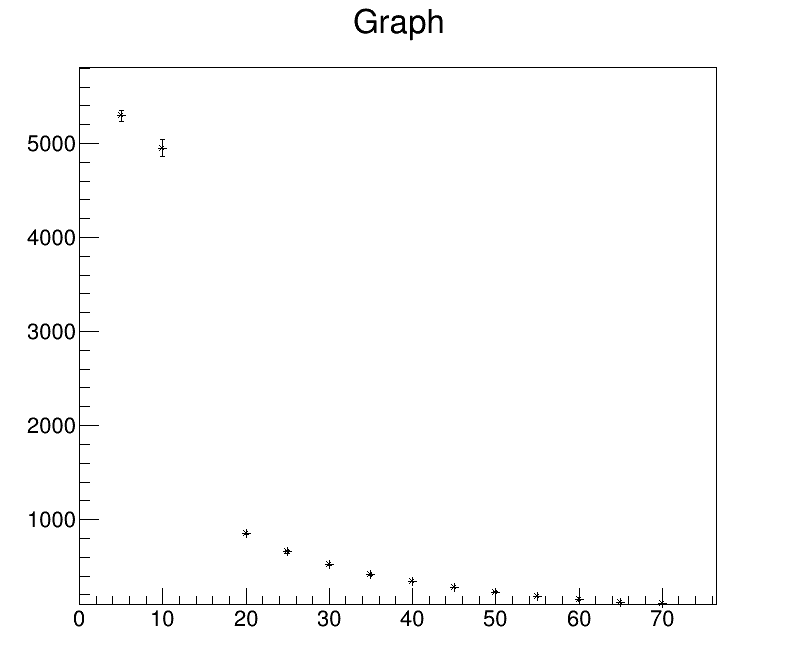

In [7]:
c1 = ROOT.TCanvas("","",800,700)
g1 = ROOT.TGraph(len(soglia_dw), array.array("f",soglia_dw), array.array("f", mean_dw))
g2 = ROOT.TGraphErrors(len(soglia_dw), array.array("f", soglia_dw), array.array("f", mean_dw),
                      array.array("f", err_soglia *13), array.array("f", std_dw))
g1.SetMarkerStyle(3)
g2.SetTitle("rate vs soglia SDW")
g2.GetXaxis().SetTitle("soglia (mV) ")
g2.GetYaxis().SetTitle("rate (s^{-1})")
g2.SetLineColor(1)
g2.SetLineStyle(1)
g1.Draw("AP")
g2.Draw("SAMEP")
c1.Draw()

Per vedere meglio il tutto, togliamo i primi due punti

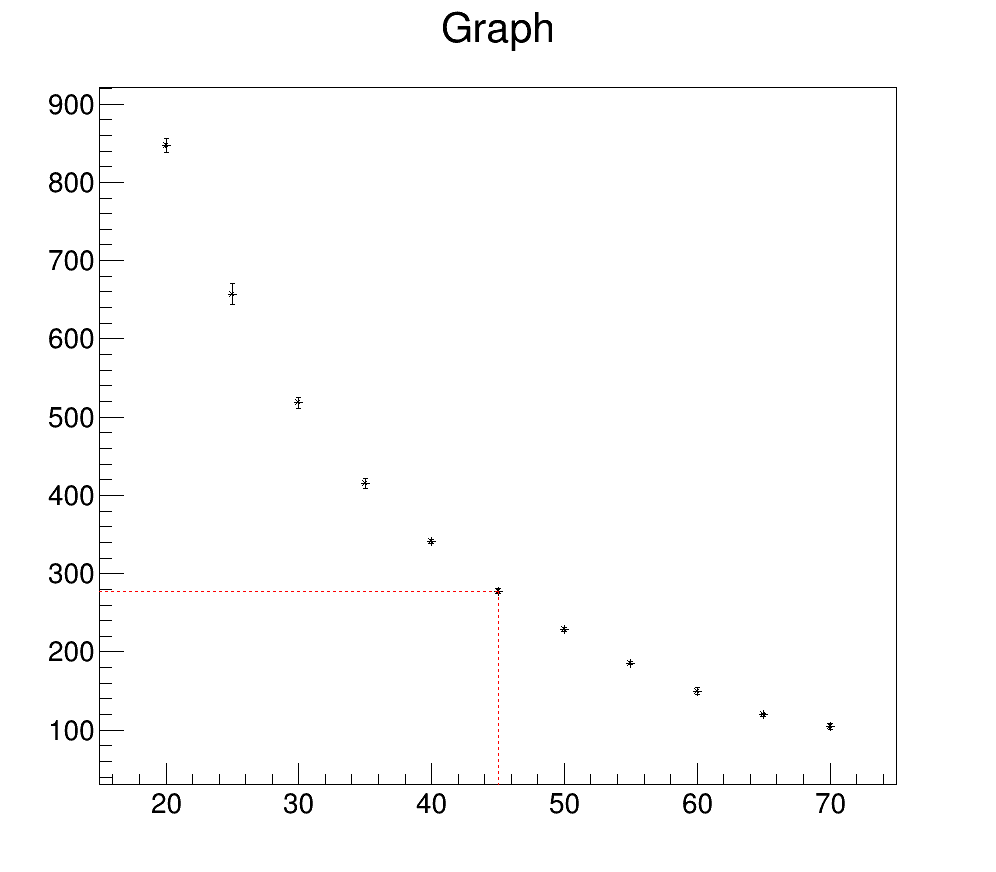

In [8]:
c1 = ROOT.TCanvas("","",1000,900)
g1 = ROOT.TGraph(len(soglia_dw[2:]), array.array("f",soglia_dw[2:]), array.array("f", mean_dw[2:]))
g2 = ROOT.TGraphErrors(len(soglia_dw[2:]), array.array("f", soglia_dw[2:]), array.array("f", mean_dw[2:]),
                      array.array("f", err_soglia *11), array.array("f", std_dw[2:]))
g3 = ROOT.TGraph(2, array.array("f", [45,45]), array.array("f", [0,mean_dw[soglia_dw.index(45)]]))
g4 = ROOT.TGraph(2, array.array("f", [0,45]), array.array("f", [mean_dw[soglia_dw.index(45)]]*2))
g1.SetMarkerStyle(3)
g2.SetLineColor(1)
g2.SetLineStyle(1)
g3.SetLineColor(2)
g4.SetLineColor(2)
g3.SetLineStyle(2)
g4.SetLineStyle(2)
g2.SetTitle("rate vs soglia SDW")
g2.GetXaxis().SetTitle("soglia (mV) ")
g2.GetYaxis().SetTitle("rate (s^{-1})")
g1.Draw("AP")
g2.Draw("SAMEP")
g3.Draw("SAME")
g4.Draw("SAME")
c1.Draw()

## Rate SUP

In [9]:
soglia_up =[27,30,35,40,45,50,55,60,65,70]
time_up = [20] * len(soglia_up)
misura_1 = [25785,16553,8034,4503,3438,2958,2679,2408,2184,1983]
misura_2 = [25305,16854,7864,4545,3448,2921,2568,2439,2210,2008]
misura_3 = [25089,16718,8067,4591,3352,2962,2721,2430,2279,2017]
misura_4 = [24914,16294,7918,4565,3490,2912,2624,2434,2228,2063]
misura_5 = [27281,16301,8121,4647,3421,2930,2653,2489,2146,2088]
mis_up = [misura_1,misura_2,misura_3,misura_4,misura_5]

In [10]:
mean_up, std_up, df_up = misure_frame(mis_up, time_up,soglia_up)

In [11]:
df_up

,soglia27,soglia30,soglia35,soglia40,soglia45,soglia50,soglia55,soglia60,soglia65,soglia70
0,25785,16553,8034,4503,3438,2958,2679,2408,2184,1983
1,25305,16854,7864,4545,3448,2921,2568,2439,2210,2008
2,25089,16718,8067,4591,3352,2962,2721,2430,2279,2017
3,24914,16294,7918,4565,3490,2912,2624,2434,2228,2063
4,27281,16301,8121,4647,3421,2930,2653,2489,2146,2088


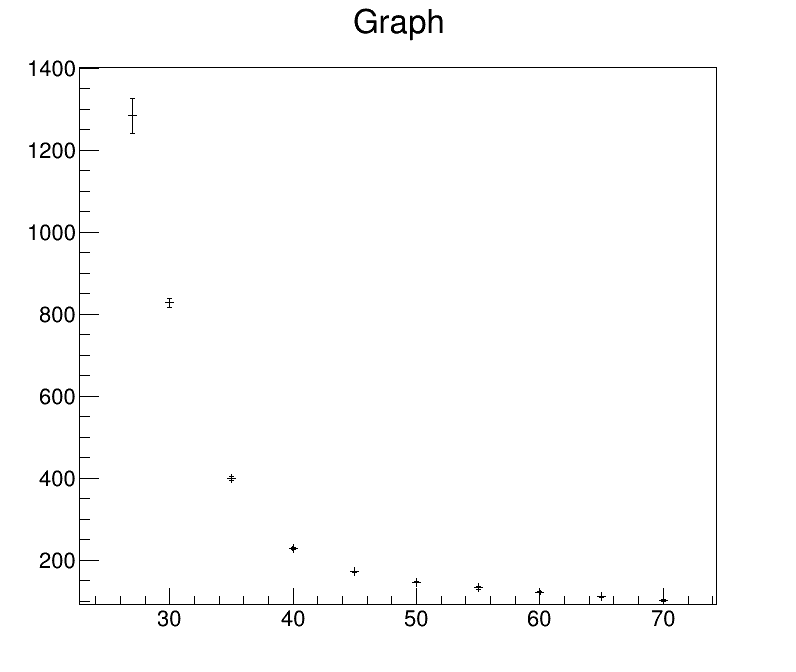

In [12]:
c1 = ROOT.TCanvas("","",800,700)
g1 = ROOT.TGraph(len(soglia_up), array.array("f",soglia_up), array.array("f", mean_up))
g2 = ROOT.TGraphErrors(len(soglia_up), array.array("f", soglia_up), array.array("f", mean_up),
                      array.array("f", err_soglia *len(soglia_up)), array.array("f", std_up))
g1.SetMarkerStyle(2)
g2.SetTitle("rate vs soglia SUP")
g2.GetXaxis().SetTitle("soglia (mV) ")
g2.GetYaxis().SetTitle("rate (s^{-1})")
g2.SetLineColor(1)
g2.SetLineStyle(1)
g1.Draw("AP")
g2.Draw("SAMEP")
c1.Draw()

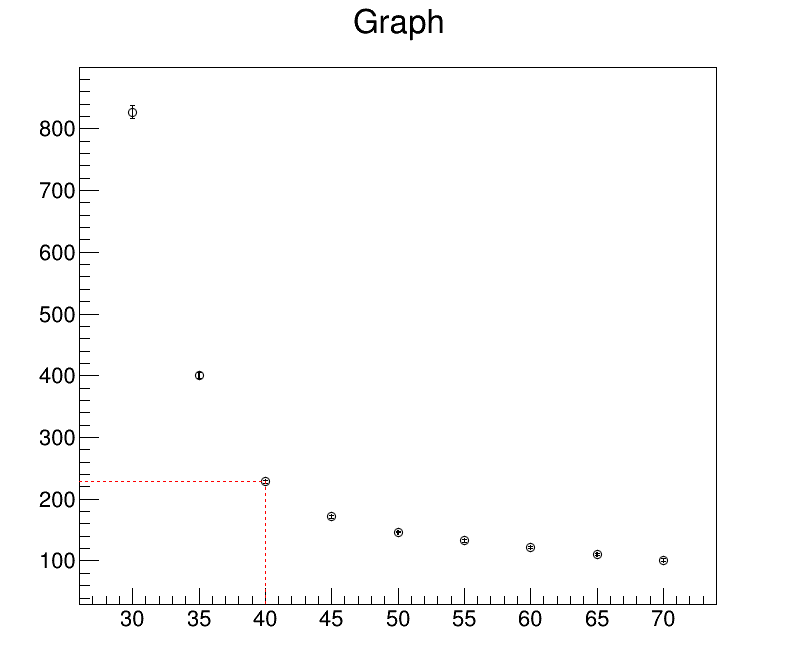

In [13]:
c1 = ROOT.TCanvas("","",800,700)
g1 = ROOT.TGraph(len(soglia_up[1:]), array.array("f",soglia_up[1:]), array.array("f", mean_up[1:]))
g2 = ROOT.TGraphErrors(len(soglia_up[1:]), array.array("f", soglia_up[1:]), array.array("f", mean_up[1:]),
                      array.array("f", err_soglia *len(soglia_up[1:])), array.array("f", std_up[1:]))
g3 = ROOT.TGraph(2, array.array("f", [40,40]), array.array("f", [0,mean_up[soglia_up.index(40)]]))
g4 = ROOT.TGraph(2, array.array("f", [0,40]), array.array("f", [mean_up[soglia_up.index(40)]]*2))
g1.SetMarkerStyle(4)
g3.SetLineColor(2)
g4.SetLineColor(2)
g3.SetLineStyle(2)
g4.SetLineStyle(2)
g2.SetTitle("rate vs soglia SUP")
g2.GetXaxis().SetTitle("soglia (mV) ")
g2.GetYaxis().SetTitle("rate (s^{-1})")
g2.SetLineColor(1)
g2.SetLineStyle(1)
g1.Draw("AP")
g2.Draw("SAMEP")
g3.Draw("SAME")
g4.Draw("SAME")
c1.Draw()

## Rate CsI

In [12]:
soglia_cs =[5,10,15,20,25,30,35,40,45,50,55,60,65]
time_cs = [20,20,35,45,55,65,75,85,95,110,110,120,120]
misura_1 = [2472,311,269,284,349,338,378,421,474,494,461,500,465]
misura_2 = [2476,324,300,282,319,390,429,444,492,529,454,521,474]
misura_3 = [2317,290,307,283,331,382,381,423,480,536,474,471,467]
mis_cs = [misura_1,misura_2,misura_3]

In [13]:
mean_cs, std_cs, df_cs = misure_frame(mis_cs, time_cs,soglia_cs)

In [14]:
df_cs

,soglia5,soglia10,soglia15,soglia20,soglia25,soglia30,soglia35,soglia40,soglia45,soglia50,soglia55,soglia60,soglia65
0,2472,311,269,284,349,338,378,421,474,494,461,500,465
1,2476,324,300,282,319,390,429,444,492,529,454,521,474
2,2317,290,307,283,331,382,381,423,480,536,474,471,467


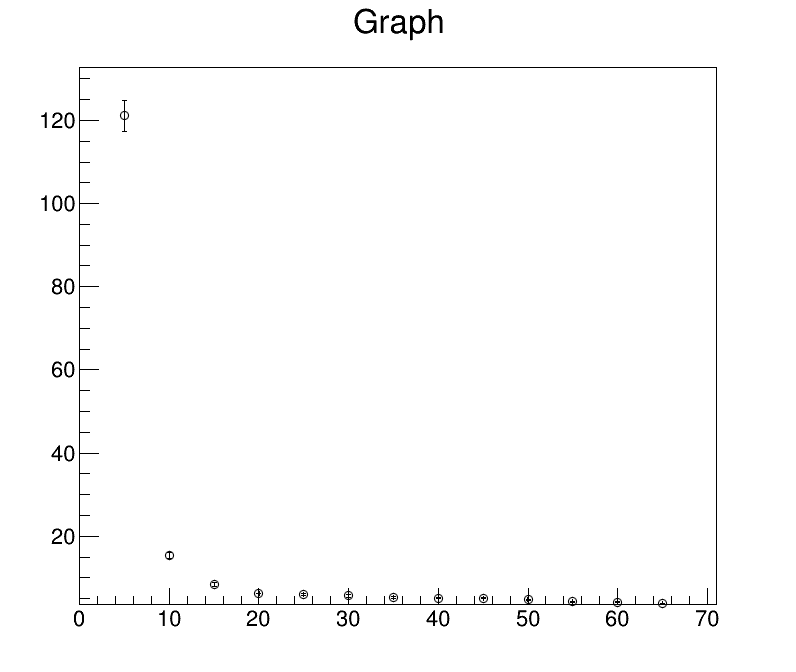

In [15]:
c1 = ROOT.TCanvas("","",800,700)
g1 = ROOT.TGraph(len(soglia_cs), array.array("f",soglia_cs), array.array("f", mean_cs))
g2 = ROOT.TGraphErrors(len(soglia_cs), array.array("f", soglia_cs), array.array("f", mean_cs),
                      array.array("f", err_soglia *len(soglia_cs)), array.array("f", std_cs))
g1.SetMarkerStyle(4)
g2.SetTitle("rate vs soglia CsI")
g2.GetXaxis().SetTitle("soglia (mV) ")
g2.GetYaxis().SetTitle("rate (s^{-1})")
g2.SetLineColor(1)
g2.SetLineStyle(1)
g1.Draw("AP")
g2.Draw("SAMEP")
c1.Draw()

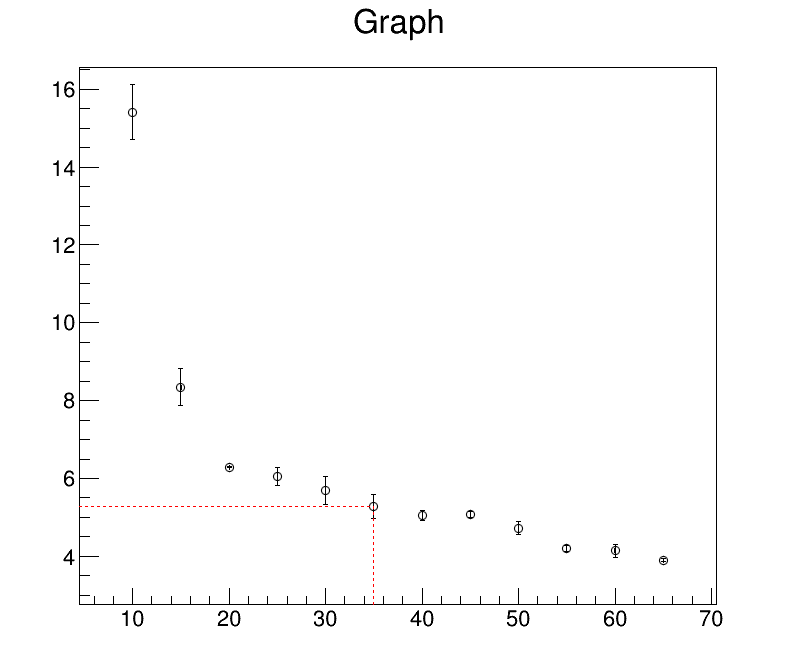

In [16]:
c1 = ROOT.TCanvas("","",800,700)
g1 = ROOT.TGraph(len(soglia_cs[1:]), array.array("f",soglia_cs[1:]), array.array("f", mean_cs[1:]))
g2 = ROOT.TGraphErrors(len(soglia_cs[1:]), array.array("f", soglia_cs[1:]), array.array("f", mean_cs[1:]),
                      array.array("f", err_soglia *len(soglia_cs[1:])), array.array("f", std_cs[1:]))
g3 = ROOT.TGraph(2, array.array("f", [35,35]), array.array("f", [0,mean_cs[soglia_cs.index(35)]]))
g4 = ROOT.TGraph(2, array.array("f", [0,35]), array.array("f", [mean_cs[soglia_cs.index(35)]]*2))
g1.SetMarkerStyle(4)
g3.SetLineColor(2)
g4.SetLineColor(2)
g3.SetLineStyle(2)
g4.SetLineStyle(2)
g2.SetTitle("rate vs soglia CsI")
g2.GetXaxis().SetTitle("soglia (mV) ")
g2.GetYaxis().SetTitle("rate (s^{-1})")
g2.SetLineColor(1)
g2.SetLineStyle(1)
g1.Draw("AP")
g2.Draw("SAMEP")
g3.Draw("SAME")
g4.Draw("SAME")
c1.Draw()

## Curve di Plateau


### Coincidenza SDW e CsI 
In questo caso abbiamo fissato
$V_{CsI} = 1200 V$
e misurato la coincidenza con lo scintillatore Down al variare della tensione su di esso. 


In [22]:
V_dw = [2200,2250,2270,2290,2310,2330,2350,2370,2390,2410,2430,2450,2470,2490]
V_dw_err = 0.02* np.array(V_dw)/100 + 2 #errore è 0.02% del valore settato + 2V
time_dw = [400,400,350,340,330,310,290,290,280,280,280,280,280,270]
dw_et_cs = [563,863,814,878,895,867,740,801,822,807,802,840,826,813]
print(V_dw_err)

[2.44  2.45  2.454 2.458 2.462 2.466 2.47  2.474 2.478 2.482 2.486 2.49
 2.494 2.498]


In [23]:
rate_dw  = np.array(dw_et_cs)/np.array(time_dw)
err_rate_dw = np.sqrt(dw_et_cs)/np.array(time_dw)

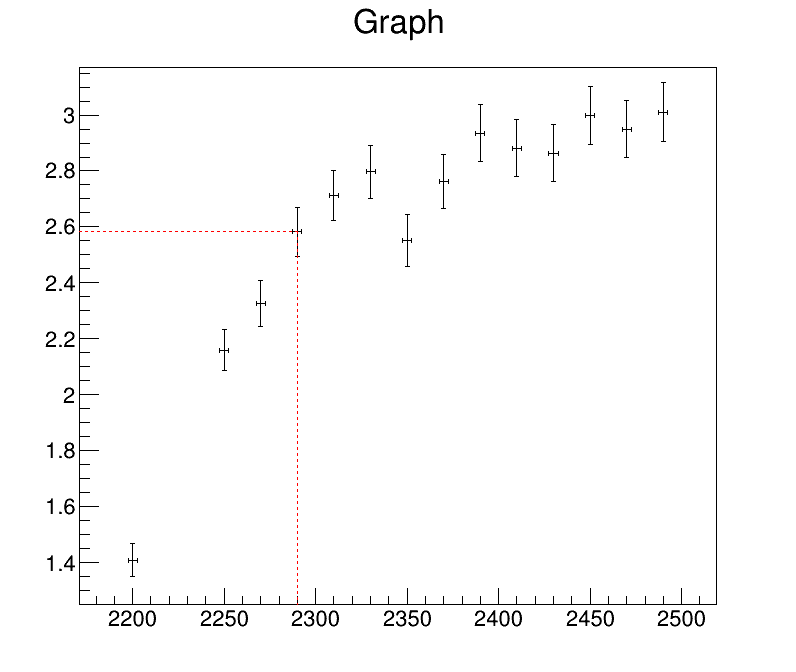

In [28]:
c1 = ROOT.TCanvas("","",800,700)
g1 = ROOT.TGraph(len(V_dw), array.array("f",V_dw), array.array("f", rate_dw))
g2 = ROOT.TGraphErrors(len(V_dw), array.array("f", V_dw), array.array("f", rate_dw),
                      array.array("f", V_dw_err), array.array("f", err_rate_dw))
g3 = ROOT.TGraph(2, array.array("f", [2290,2290]), array.array("f", [0,rate_dw[V_dw.index(2290)]]))
g4 = ROOT.TGraph(2, array.array("f", [0,2290]), array.array("f", [rate_dw[V_dw.index(2290)]]*2))
g2.SetMarkerStyle(2)
g3.SetLineColor(2)
g3.SetLineStyle(2)
g4.SetLineStyle(2)
g4.SetLineColor(2)
g2.SetTitle("rate vs tensione DW")
g2.GetXaxis().SetTitle("V_{DW} (V) ")
g2.GetYaxis().SetTitle("rate (s^{-1})")
g2.SetLineColor(1)
g2.SetLineStyle(1)
g1.Draw("AP")
g2.Draw("SAMEP")
g3.Draw("SAME")
g4.Draw("SAME")
c1.Draw()

### Coincidenza SDW e SUP 
In questo caso abbiamo fissato
$V_{SDW} = 2290V$
Messo un ritardo di $220 ns$ tra up e dw 
e misurato la coincidenza con lo scintillatore Up al variare della tensione su di esso. 
Contemporaneamente abbiamo fatto la stessa cosa usando il TDC

In [29]:
V_up = [2000,2050,2100,2150,2200,2250,2275,2300,2350,2400]
V_up_err = 0.02*np.array(V_up)/100 + 2
time_up = np.array([400,400,380,350,300,260,250,240,200,100])
up_et_dw = np.array([323,874,1482,1876,1770,1671,1693,1757,2283,1145])
single_up = np.array([1219,3930,11250,20268,29173,43442,59562,146107,487753,336689])
single_dw = np.array([357330,356796,388742,363695,308106,273048,243383,250170,234702,95917])

In [30]:
rate_up = up_et_dw/time_up
err_rate_up = np.sqrt(up_et_dw)/time_up

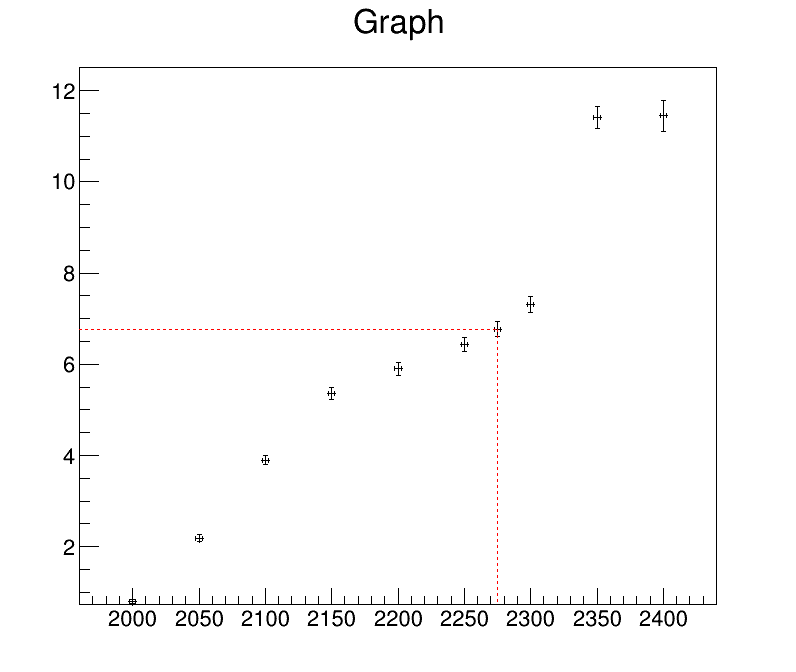

In [31]:
c1 = ROOT.TCanvas("","",800,700)
g1 = ROOT.TGraph(len(V_up), array.array("f",V_up), array.array("f", rate_up))
g2 = ROOT.TGraphErrors(len(V_up), array.array("f", V_up), array.array("f", rate_up),
                      array.array("f", V_up_err), array.array("f", err_rate_up))
g3 = ROOT.TGraph(2, array.array("f", [2275,2275]), array.array("f", [0,rate_up[V_up.index(2275)]]))
g4 = ROOT.TGraph(2, array.array("f", [0,2275]), array.array("f", [rate_up[V_up.index(2275)]]*2))
g2.SetMarkerStyle(2)
g3.SetLineColor(2)
g3.SetLineStyle(2)
g4.SetLineStyle(2)
g4.SetLineColor(2)
g2.SetTitle("rate vs tensione UP")
g2.GetXaxis().SetTitle("V_{UP} (V) ")
g2.GetYaxis().SetTitle("rate (s^{-1})")
g2.SetLineColor(1)
g2.SetLineStyle(1)
g1.Draw("AP")
g2.Draw("SAMEP")
g3.Draw("SAME")
g4.Draw("SAME")
c1.Draw()

Vogliamo adesso considerare anche le casuali con la formula
$N_1 N_2 (T_1+T_2)$ dove $N_1$ e $N_2$ sono i rate delle singole mentre $T_1$e $T_2$ sono le durate dei segnali che valgono rispettivamente per l'up e il down $430 ns$ e $200 ns$

In [32]:
t_up,t_dw = 430*10**(-9), 540*10**(-9)
single_rate_up = single_up/time_up
single_rate_dw = single_dw/time_up
casuali_up_dw = single_rate_up * single_rate_dw * (t_up + t_dw) *time_up

In [33]:
rate_corr = (up_et_dw - casuali_up_dw)/time_up
print(casuali_up_dw)
#print(single_rate_up)
print(np.sqrt(up_et_dw))

[  1.05629428   3.40035508  11.16354493  20.42922615  29.06241683
  44.25345646  56.24594759 147.7293356  555.21153234 313.25372849]
[17.97220076 29.563491   38.49675311 43.31281566 42.07136794 40.87786687
 41.14608122 41.91658383 47.78074926 33.83784863]


In [34]:
print(rate_corr)
print(rate_up)

[0.80485926 2.17649911 3.87062225 5.30163078 5.80312528 6.25671748
 6.54701621 6.70529443 8.63894234 8.31746272]
[ 0.8075      2.185       3.9         5.36        5.9         6.42692308
  6.772       7.32083333 11.415      11.45      ]


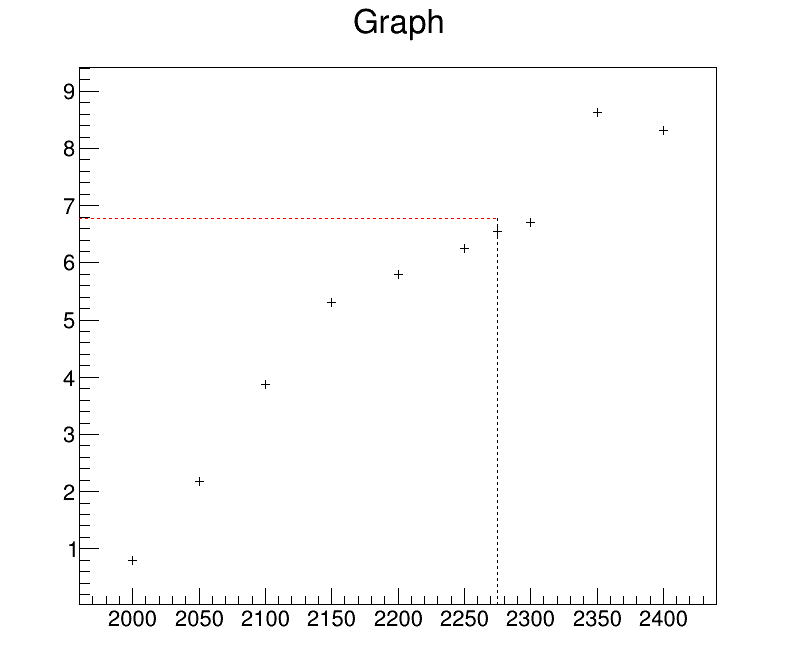

In [35]:
c1 = ROOT.TCanvas("","",800,700)
g1 = ROOT.TGraph(len(V_up), array.array("f",V_up), array.array("f", rate_corr))
#g2 = ROOT.TGraphErrors(len(V_up), array.array("f", V_up), array.array("f", rate_corr),
 #                     array.array("f", [0]*len(rate_up)), array.array("f", err_rate_up))
g3 = ROOT.TGraph(2, array.array("f", [2275,2275]), array.array("f", [0,rate_up[V_up.index(2275)]]))
g4 = ROOT.TGraph(2, array.array("f", [0,2275]), array.array("f", [rate_up[V_up.index(2275)]]*2))
g2.SetMarkerStyle(2)
g1.SetMarkerStyle(2)
g3.SetLineStyle(2)
g4.SetLineStyle(2)
g4.SetLineColor(2)
g2.SetTitle("rate vs tensione UP")
g2.GetXaxis().SetTitle("V_{UP} (V) ")
g2.GetYaxis().SetTitle("rate (s^{-1})")
g2.SetLineColor(1)
g2.SetLineStyle(1)
g1.Draw("AP")
#g2.Draw("SAMEAP")
g3.Draw("SAME")
g4.Draw("SAME")
c1.Draw()

## Coincidenze SDW e CsI
Per il Dw abbiamo considerato la tensione fissata prima e abbiamo misurato le coincidenze e le singole

In [36]:
V_cs_1 = [950,1000,1050,1100,1100,1125,1150,1150,1150,1175,1175,1200,1200,1225,1250,1275]
time_cs_1 = [280,270,270,240,240,230,230,220,230,210,210,200,200,200,200,200]
cs_et_dw_1 = [142,408,501,506,520,515,528,482,547,467,466,493,507,480,457,519]
single_cs_1 = [312,699,930,1008,1013,1090,1127,1094,1167,1094,1069,1197,1200,1262,1294,1545]
single_dw_1 = [135872,131391,131203,116145,132449,130753,124922,131066,136192,121621,122752,
             116556,118308,118178,116314,115466]

In [37]:
V_cs = []
time_cs = []
cs_et_dw = []
single_cs = []
single_dw = []
for i in range(len(V_cs_1)):
    #print(i)
    V_el = V_cs_1[i]
    #print(i,V_el)
    if V_el not in V_cs:
        V_cs.append(V_el)
        time_cs.append(time_cs_1[i])
        cs_et_dw.append(cs_et_dw_1[i])
        single_cs.append(single_cs_1[i])
        single_dw.append(single_dw_1[i])
    elif V_el in V_cs and time_cs_1[i] == time_cs_1[V_cs_1.index(V_el)] and i != 0:
        #print("Elif")
        mean_coinc = (cs_et_dw[-1] + cs_et_dw_1[i])/2
        mean_dw = (single_dw[-1] + single_dw_1[i])/2
        mean_cs = (single_cs[-1] + single_cs_1[i])/2
        cs_et_dw[-1] = mean_coinc
        single_cs[-1] = mean_cs
        single_dw[-1] = mean_dw
        
#print(V_cs)
#print(cs_et_dw)   
        

In [38]:
print(time_cs)
print(V_cs)
V_cs_err = 0.02*np.array(V_cs)/100 + 2
print(single_dw)

[280, 270, 270, 240, 230, 230, 210, 200, 200, 200, 200]
[950, 1000, 1050, 1100, 1125, 1150, 1175, 1200, 1225, 1250, 1275]
[135872, 131391, 131203, 124297.0, 130753, 130557.0, 122186.5, 117432.0, 118178, 116314, 115466]


In [39]:
rate_cs = np.array(cs_et_dw)/np.array(time_cs)
err_rate_cs = np.sqrt(cs_et_dw)/np.array(time_cs)

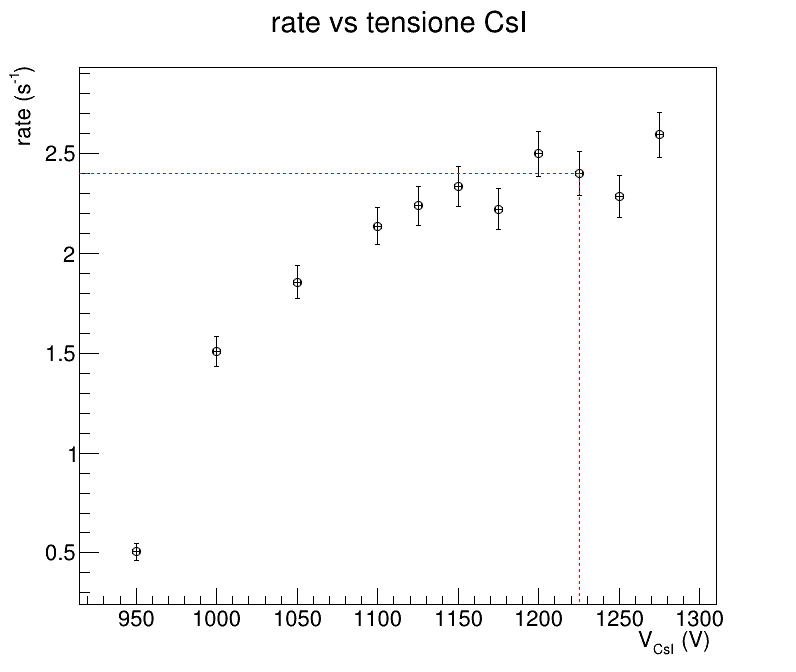

In [40]:
c1 = ROOT.TCanvas("","",800,700)
g1 = ROOT.TGraph(len(V_cs), array.array("f",V_cs), array.array("f", rate_cs))
g2 = ROOT.TGraphErrors(len(V_cs), array.array("f", V_cs), array.array("f", rate_cs),
                      array.array("f", V_cs_err), array.array("f", err_rate_cs))
g3 = ROOT.TGraph(2, array.array("f", [1225,1225]), array.array("f", [0,rate_cs[V_cs.index(1225)]]))
g4 = ROOT.TGraph(2, array.array("f", [0,1225]), array.array("f", [rate_cs[V_cs.index(1225)]]*2))
g2.SetMarkerStyle(4)
g3.SetLineColor(2)
g3.SetLineStyle(2)
g4.SetLineStyle(2)
g4.SetLineColor(2)
g2.SetTitle("rate vs tensione CsI")
g2.GetXaxis().SetTitle("V_{CsI} (V) ")
g2.GetYaxis().SetTitle("rate (s^{-1})")
g2.SetLineColor(1)
g2.SetLineStyle(1)
g1.Draw("AP")
g2.Draw("SAMEAP")
g3.Draw("SAME")
g4.Draw("SAME")
c1.Draw()

In [41]:
t_cs,t_dw = 272*10**(-9), 344*10**(-9)
single_rate_cs = np.array(single_cs)/np.array(time_cs)
single_rate_dw = np.array(single_dw)/np.array(time_cs)
casuali_cs_dw = np.array(single_rate_cs) * np.array(single_rate_dw) * (t_cs + t_dw) *np.array(time_cs)

In [42]:
print(casuali_cs_dw)

print(np.sqrt(cs_et_dw))

[0.09326254 0.20953653 0.27838361 0.32237877 0.3817078  0.40106656
 0.38762445 0.43348614 0.45935316 0.46357177 0.54945651]
[11.91637529 20.19900988 22.38302929 22.64950331 22.69361144 23.18404624
 21.59861107 22.36067977 21.9089023  21.37755833 22.7815715 ]


In [43]:
print(single_rate_cs)
print(single_rate_dw)
print(time_cs)


[1.11428571 2.58888889 3.44444444 4.21041667 4.73913043 4.98695652
 5.15       5.9925     6.31       6.47       7.725     ]
[485.25714286 486.63333333 485.93703704 517.90416667 568.49130435
 567.63913043 581.84047619 587.16       590.89       581.57
 577.33      ]
[280, 270, 270, 240, 230, 230, 210, 200, 200, 200, 200]
